# Sistemas Inteligentes

## Exercício Computacional 2 - Classificação

Preencha todas as células adequadamente e responda todas as perguntas de forma completa e elaborada.

### Instruções

Treine e teste um classificador à sua escolha utilizando a base de dados **Olivetti Faces** (veja as referências).

Faça um caso com com *k-Fold* e um caso de forma direta, ou seja, utilizando o *train_test_split*.

Exiba a acurácia e a *Confusion Matrix*, então discuta sobre o desempenho do classificador para os dois casos.

Entre as células de códigos, insira células de tipo *Markdown* para fornecer explicações sobre os passos realizados; não insira apenas códigos "soltos" sem explicação.

Dica: desta vez, estamos lidando com uma quantidade relativamente grande de classes, então pode ser interessante exibir a *Confusion Matrix* utilizando escala de cinza para representar os valores de cada célula da matriz; para fazer isso, prefira utilizar a função **imshow** com o mapa de cores (argumento **cmap**) do tipo **'Greys'**.

**EXTRA**: tente fazer um caso com *Bootstrap* em vez de *k-Fold*, então comente sobre o método e os resultados.

## Desenvolvimento

### 1 - Importação dos dados e entendimento


Importação da base de dados

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

Sobre o dataset, a referência do scikit-learn nos diz que "*There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).*"

In [ ]:
dataset = fetch_olivetti_faces()

Visualizando os dados

In [ ]:
dataset

{'DESCR': '.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n

Veja que a variável dataset tem estrutura de dicionário. Para cada chave do dicionário segue uma breve explicação retirada da referência:
* **data** - Cada linha corresponde a uma imagem desarrumada das faces com tamanho 64x64 (400 x 4096)
* **images** - Cada linha é a face de um dos 40 indíviduos do dataset (400 x 64 x 64)
* **target** - Labels associadas a cada imagem contendo o id de cada indivíduo

Dito tudo isso, concluímos que:
* 400 imagens no dataset
* 40 targets (classes) únicos 
* Cada imagem tem tamanho 64x64
* Cada valor das imagens (pixel) varia entre 0 e 1
* **images** e **data** possuem os mesmos valores mas em formatos diferentes

### 2 - Divisão e treino usando *split*

Abaixo fazemos a importação da função de *split* e em segui o próprio *split* dos dados usando uma razão 1/4. Perceba que fixamos o *random_state* e definimos uma estratificação por causa da grande quantidade de classes.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(dataset.data, dataset.target, test_size=0.25, stratify=dataset.target, random_state=0)

O modelo que usaremos no nosso treinamento será baseado no K-Nearest Neighbors (KNN). Usaremos um número de vizinhos igual a 7, valor ímpar e baixo.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
modelo_split = KNeighborsClassifier(n_neighbors=7)

In [ ]:
modelo_split.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

Para finalizar a seção usamos o modelo para predizer o conjunto x de teste.

In [ ]:
y_pred = modelo_split.predict(x_test)

### 3 - Avaliação dos resultados de modelo com split

Nessa seção avaliaremos o modelo de KNN que usou o método de *split* na divisão de conjuntos de teste e treino. As formas de avaliação tratadas aqui serão a métrica de acurácia e a matriz de confusão da classificação.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

Na célula abaixo calculamos a métrica de acurácia.

In [ ]:
accuracy_score(y_test, y_pred)

0.84

Abaixo já mostramos a matriz de confusão do modelo.

In [ ]:
confusion_matrix(y_test, y_pred)

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 1, 0, 1]])

Devido à grande quantidade de classes vamos utilizar como alternativa à matriz de confusão um heatmap que pode passar a ideia da qualidade do classificador de maneira mais visual que o formato tabelado da matriz de confusão.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
map_cf_matrix = pd.DataFrame(cf_matrix, index = range(40), columns = range(40))

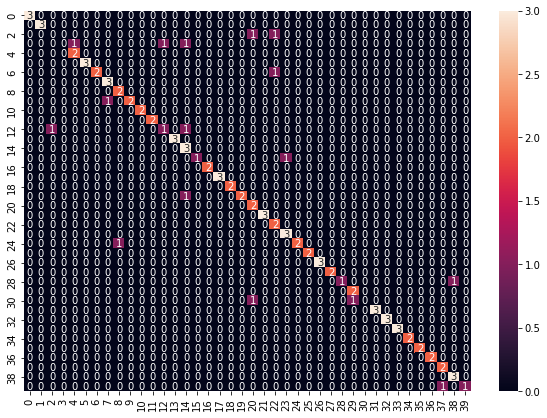

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(map_cf_matrix, annot=True)

### 4 - E se não usarmos o shuffle?

Nessa seção veremos o que seria o resultado ruim do nosso teste. O que ocorre quando não inserimos aleatoriedade num dataset que está organizado.

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(dataset.data, dataset.target, test_size=0.25, shuffle=False)

In [ ]:
modelo_split = KNeighborsClassifier(n_neighbors=7)

In [ ]:
modelo_split.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = modelo_split.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.0

Veja que a acurácia resultante foi zero.

### 5 - Divisão, treino e avaliação usando k-fold

Nessa seção usaremos como estratégia de treino do modelo o *k-fold*, que basicamente consiste em dividir os dados em k divisões. A cada rodada uma das divisões é usada na validação enquanto as outras são usadas no treino. Aqui usaremos o algoritmo considerando 10 folds.

Usaremos a função *cross_val_score* que já traz o resultado de uma métrica passada como parâmetro para cada uma das iterações do k-fold. A métrica que usaremos será a acurácia.

Como no treino que usou o método split, também usaremos um KNN com 7 vizinhos.

Antes de testarmos o modelo vamos fazer um shuffle nos dados para inserir aleatoriedade.

Outro detalhe importante é que usaremos um método alternativo ao do professor, pois usaremos as funções cross_val_score e cross_val_predict.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import utils
import numpy as np

In [ ]:
modelo_kfold = KNeighborsClassifier(n_neighbors=7)

In [ ]:
np.random.seed(0)
dataset.data, dataset.target = utils.shuffle(dataset.data, dataset.target)

In [ ]:
scores = cross_val_score(modelo_kfold, dataset.data, dataset.target, cv = 10, scoring = "accuracy")
print(scores)

[0.85  0.85  0.85  0.85  0.85  0.825 0.825 0.875 0.85  0.8  ]


Para avaliar esse método de treino usando KNN vamos encontrar a média dos scores.

In [ ]:
scores.mean()

0.8425

Além disso também podemos verificar como se deu a confusion matrix dessa forma de treino. No contexto do k-fold, cada treinamento feito em uma rodada gera uma matriz de confusão, mas veja que como em cada rodada um fold dos dados é usado para teste, então, no final, todos os elementos foram preditos em algum momento. Assim, podemos mostrar a matriz de confusão que representa a soma de todas as matrizes de confusão intermediárias.

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_pred = cross_val_predict(modelo_kfold, dataset.data, dataset.target, cv = 10)

In [ ]:
cf_matrix_kfold = confusion_matrix(dataset.target, y_pred)

In [ ]:
cf_matrix_kfold

array([[ 6,  0,  0, ...,  0,  0,  1],
       [ 0, 10,  0, ...,  0,  0,  0],
       [ 0,  0,  6, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  9,  0,  0],
       [ 0,  0,  0, ...,  0, 10,  0],
       [ 1,  0,  1, ...,  1,  0,  1]])

Da mesma forma que fizemos na parte onde usamos o split, vamos usar um heatmap para representar a matriz de confusão.

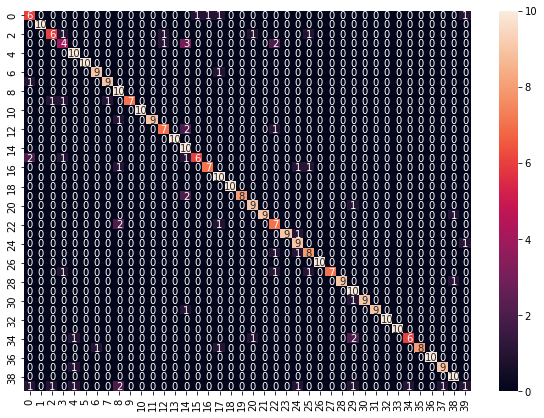

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cf_matrix_kfold, annot=True)

### 6 - Usando o bootstrap


Por fim, usaremos o método bootstrap, o que significa que usaremos resampling com reposição. Usaremos uma amostra de 80% dos dados. Além disso, o experimento será repetido 10 vezes.

In [ ]:
tam_amostra = int(dataset.data.shape[0]*0.8)

In [ ]:
n_repeticoes = 10

In [ ]:
from sklearn.utils import resample

In [ ]:
modelo_boot = KNeighborsClassifier(n_neighbors=7)

In [ ]:
resultados_bootstrap = []
for repeticao in range(n_repeticoes):
  boot = resample(range(dataset.data.shape[0]), replace = True, n_samples = tam_amostra, stratify=dataset.target)
  not_boot = [x for x in range(dataset.data.shape[0]) if x not in boot]
  x_boot_train, y_boot_train = dataset.data[boot], dataset.target[boot]
  x_not_boot_test, y_not_boot_test = dataset.data[not_boot], dataset.target[not_boot]
  modelo_boot.fit(x_boot_train, y_boot_train)
  y_pred = modelo_boot.predict(x_not_boot_test)
  acc = accuracy_score(y_not_boot_test, y_pred)
  print(f"Treino Bootstrap {repeticao+1} = {acc}")
  resultados_bootstrap.append(acc)

Treino Bootstrap 1 = 0.7542857142857143
Treino Bootstrap 2 = 0.7413793103448276
Treino Bootstrap 3 = 0.6705882352941176
Treino Bootstrap 4 = 0.6976744186046512
Treino Bootstrap 5 = 0.7559523809523809
Treino Bootstrap 6 = 0.7751479289940828
Treino Bootstrap 7 = 0.76
Treino Bootstrap 8 = 0.6264367816091954
Treino Bootstrap 9 = 0.718562874251497
Treino Bootstrap 10 = 0.7041420118343196


## Questões

### 1. O classificador escolhido por você obteve um bom desempenho em sua opinião? Por que?

O classificador escolhido foi o KNN e obteve um resultado ruim segundo a opinião do grupo. Afinal, em comparação com os resultados apresentados pelo professor durante a aula prática, os resultados foram consideravelmente inferiores quando falamos da métrica de acurácia. 

### 2. Além da acurácia e da matriz de confusão, quais métricas e recursos poderiam ser utilizados para avaliar o seu classificador?

Em complemento a Acurácia e Matriz de Confusão, poderia ser utilizado a Precisão, Sensibilidade, Especificidade e Taxa de Erro. A Taxa de Erros é o oposto da Acurácia, que é o valor de erros sobre todos os valores encontrados; a Precisão indica a quantidade de positivos sobre todos os positivos (Falso Positivo e Positivo Verdadeiro); a Sensibilidade avalia o grau de sucesso dos resultados com base no Verdadeiro Positivo em relação ao Verdadeiro Positivo e o Falso Negativo; Já a Especificidade é o oposto da Sensibilidade, no qual é avaliado o Verdadeiro Negativo em relação ao Falso Positivo e o Verdadeiro Negativo. Lembrando que, cada uma das métricas é calculada para cada classe analisada.

### 3. O seu classificador obteve um desempenho notoriamente superior ou inferior para alguma das classes? Para qual(is)? Por que você acredita que isso ocorreu?

Sim, algumas classes não tiveram uma boa classificação como por exemplo a classe 3, um dos motivos pode ser que a maioria das imagens utilizadas não foram para teste. Porém outras classes tiveram 100% de acerto como por exemplo a classe 1, o motivo pode ser devido a um equilibrio entre teste e avaliação.Também é importante ressaltar que usando técnicas diferentes os resultados também foram diferentes, por exemplo, a classe 40 apresenta um resultado muito ruim no k-fold, enquanto apresenta um resultado médio no split normal.

### 4. O que se poderia fazer para melhorar o desempenho de seu classificador?

Acreditamos que aumentar a base de dados seja a melhor maneira de obter melhor desempenho, isso considerando que ainda estariamos falando o KNN. Além disso, poderia ter feito testes para outros valores de vizinhos no KNN.

### 5. Se fosse utilizada apenas metade da base de dados deste exercício em vez de ela toda, mas mantendo as proporções para os dados de treinamento e teste, os resultados sofreriam alguma mudança significativa? Se sim, quais e em qual intensidade?

Sim, a diminuição da base ocasionaria em uma redução no número de testes para treino, consequentemente o classificador iria aprender "menos". Por isso, acreditamos que a acurácia do classificador iria diminuir de forma considerável já que o modelo poderia perder capacidade de conhecimento.

### 6. Para quê servem métodos como k-Fold e Bootstrap? Você observou alguma mudança significativa por conta de sua utilização? Se sim, qual? E a quê se deve isso?

Os métodos como k-fold e Bootstrap são métodos de dividir e treinar sua amostra diversas vezes com os mesmos dados. Eles selecionam amostras diferentes de testes e treino. O k-fold apresentou resultado bem semelhante de acurácia com o apontado pelo split normal, enquanto o Bootstrap apresentou um resultado diferente e bem inferior. 

Sobre o k-fold apresentar um resultado semelhante acreditamos que faça sentido, pois cada treino nada mais é que um split organizado, onde em cada etapa do treino uma fold, que é uma parte dos dados, acaba sendo usada para teste e todas as outras são usadas para treino, caracterizando sempre um split k-1 folds para 1 fold. 

Já sobre o Bootstrap, também acreditamos que faça sentido o resultado apresentado, pois o Bootstrap faz amostragem com substituição, ou seja, um mesmo elemento pode ser selecionado várias vezes para o conjunto de treino ou teste, assim, algumas poucas classes podem estar tomando o lugar de outras classes por estarem sendo sempre escolhidas na amostragem com reposição, o que faria com que o treino do modelo fosse realmente menos eficiente.

## Referências

[Scikit-Learn - Datasets - Olivetti Faces](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)

[Scikit-Learn - Resample (Bootstrap)](http://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - LinearDiscriminantAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

[Scikit-Learn - LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[Scikit-Learn - MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)